### Decision Tree Base Model Hypertuning  
  
The decision tree base model was overfitting, so this notebook is for resolving that.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [26]:
df = pd.read_csv('base_band_dataset.csv')

In [27]:
depths = [(i + 1) * 5 for i in range(10)]

In [28]:
X = df.drop(columns = 'activity')
y = df['activity']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [30]:
accuracies, f1_scores = [], []
test_accs, test_f1_scores = [], []
f1_activity = []
for d in depths:
    tree = DecisionTreeClassifier(max_depth = d)
    tree.fit(X_train, y_train)
    yhat1 = tree.predict(X_train)
    yhat2 = tree.predict(X_test)
    accuracies.append(accuracy_score(y_train, yhat1))
    f1_scores.append(f1_score(y_train, yhat1, average = 'macro'))
    test_accs.append(accuracy_score(y_test, yhat2))
    test_f1_scores.append(f1_score(y_test, yhat2, average = 'macro'))
    f1_activity.append(f1_score(y_test, yhat2, average = None))

In [31]:
pd.DataFrame(f1_activity, index = depths, columns = np.unique(df['activity'])).transpose()

,5,10,15,20,25,30,35,40,45,50
GPD,0.559091,0.609700,0.637681,0.621514,0.617530,0.624746,0.608350,0.623016,0.632207,0.620690
GRDA,0.439955,0.433083,0.455652,0.465116,0.468240,0.435398,0.473881,0.470588,0.466055,0.468240
LPD,0.423792,0.422857,0.462475,0.474308,0.475442,0.463074,0.454012,0.459082,0.456349,0.452906
LRDA,0.183007,0.422145,0.506931,0.553459,0.524793,0.524390,0.534161,0.520833,0.532000,0.545833
Other,0.311111,0.263636,0.297398,0.304511,0.335821,0.291115,0.326531,0.333333,0.323587,0.324022
Seizure,0.297436,0.353222,0.386266,0.376033,0.389121,0.387500,0.409836,0.416667,0.395960,0.364000


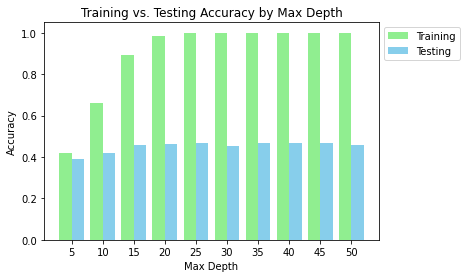

In [33]:
X_axis = np.arange(len(depths))

plt.bar(X_axis - 0.2, accuracies, 0.4, label = 'Training', color = 'lightgreen') 
plt.bar(X_axis + 0.2, test_accs, 0.4, label = 'Testing', color = 'skyblue') 
  
plt.xticks(X_axis, depths)
plt.xlabel('Max Depth') 
plt.ylabel('Accuracy') 
plt.title('Training vs. Testing Accuracy by Max Depth')
plt.legend(bbox_to_anchor = [1, 1], loc = 'upper left') 
plt.show()

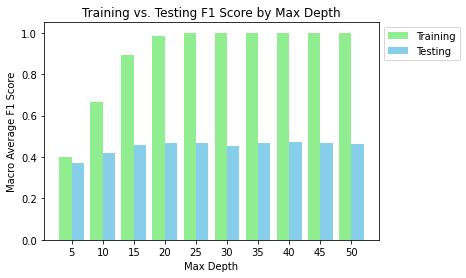

In [34]:
X_axis = np.arange(len(depths))

plt.bar(X_axis - 0.2, f1_scores, 0.4, label = 'Training', color = 'lightgreen') 
plt.bar(X_axis + 0.2, test_f1_scores, 0.4, label = 'Testing', color = 'skyblue') 
  
plt.xticks(X_axis, depths)
plt.xlabel('Max Depth') 
plt.ylabel('Macro Average F1 Score') 
plt.title('Training vs. Testing F1 Score by Max Depth')
plt.legend(bbox_to_anchor = [1, 1], loc = 'upper left') 
plt.show()

In [35]:
depths = [i for i in range(5, 16)]
accuracies, f1_scores = [], []
test_accs, test_f1_scores = [], []
f1_by_activity = []
for d in depths:
    tree = DecisionTreeClassifier(max_depth = d)
    tree.fit(X_train, y_train)
    yhat1 = tree.predict(X_train)
    yhat2 = tree.predict(X_test)
    accuracies.append(accuracy_score(y_train, yhat1))
    f1_scores.append(f1_score(y_train, yhat1, average = 'macro'))
    test_accs.append(accuracy_score(y_test, yhat2))
    test_f1_scores.append(f1_score(y_test, yhat2, average = 'macro'))
    f1_by_activity.append(f1_score(y_test, yhat2, average = None))

In [36]:
pd.DataFrame(f1_by_activity, index = depths, columns = np.unique(df['activity'])).transpose()

,5,6,7,8,9,10,11,12,13,14,15
GPD,0.555809,0.585956,0.604651,0.600473,0.610860,0.611872,0.612335,0.569672,0.582121,0.607438,0.585366
GRDA,0.439955,0.448060,0.446970,0.399317,0.447326,0.436472,0.452489,0.451510,0.456086,0.426446,0.472028
LPD,0.423792,0.433145,0.438017,0.420408,0.413646,0.416667,0.431138,0.418868,0.438662,0.456075,0.454183
LRDA,0.183007,0.273902,0.278689,0.398074,0.428835,0.434629,0.449726,0.477137,0.484716,0.528455,0.500000
Other,0.311111,0.299180,0.270742,0.261438,0.302583,0.243902,0.240860,0.275269,0.322200,0.304950,0.299810
Seizure,0.296675,0.330317,0.347170,0.388309,0.383073,0.357843,0.348837,0.355056,0.348235,0.364465,0.364026


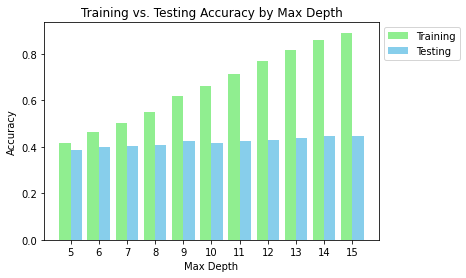

In [37]:
X_axis = np.arange(len(depths))

plt.bar(X_axis - 0.2, accuracies, 0.4, label = 'Training', color = 'lightgreen') 
plt.bar(X_axis + 0.2, test_accs, 0.4, label = 'Testing', color = 'skyblue') 
  
plt.xticks(X_axis, depths)
plt.xlabel('Max Depth') 
plt.ylabel('Accuracy') 
plt.title('Training vs. Testing Accuracy by Max Depth')
plt.legend(bbox_to_anchor = [1, 1], loc = 'upper left') 
plt.show()

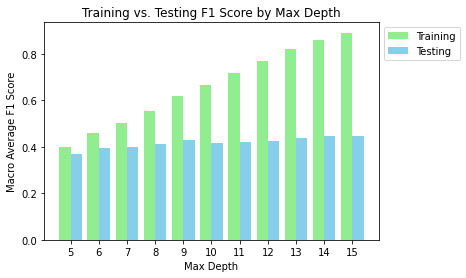

In [38]:
X_axis = np.arange(len(depths))

plt.bar(X_axis - 0.2, f1_scores, 0.4, label = 'Training', color = 'lightgreen') 
plt.bar(X_axis + 0.2, test_f1_scores, 0.4, label = 'Testing', color = 'skyblue') 
  
plt.xticks(X_axis, depths)
plt.xlabel('Max Depth') 
plt.ylabel('Macro Average F1 Score') 
plt.title('Training vs. Testing F1 Score by Max Depth')
plt.legend(bbox_to_anchor = [1, 1], loc = 'upper left') 
plt.show()